In [132]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import utils
import warnings
warnings.filterwarnings('ignore')


In [112]:
car=pd.read_csv("/content/quikr_car.csv")


In [113]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [114]:
car.shape

(892, 6)

In [115]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


Creating backup copy


In [116]:
backup=car.copy()




**Cleaning Data
year has many non-year values**









In [117]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')


In [118]:
car=car.reset_index(drop=True)


In [119]:
car


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2,Honda,2014,"1,80,000",Petrol,NaN


In [120]:
car.to_csv('Cleaned_Car_data.csv')


In [121]:
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [122]:
car.describe(include='all')


,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,303,48,61,274,258,3
top,Maruti Suzuki Swift,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,55,235,117,35,30,440


In [130]:
car=car[car['Price']<6000000]


TypeError: '<' not supported between instances of 'str' and 'int'

Checking relationship of Company with Price


In [124]:
car['company'].unique()


array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

Visualizng The Data

In [125]:
import seaborn as sns



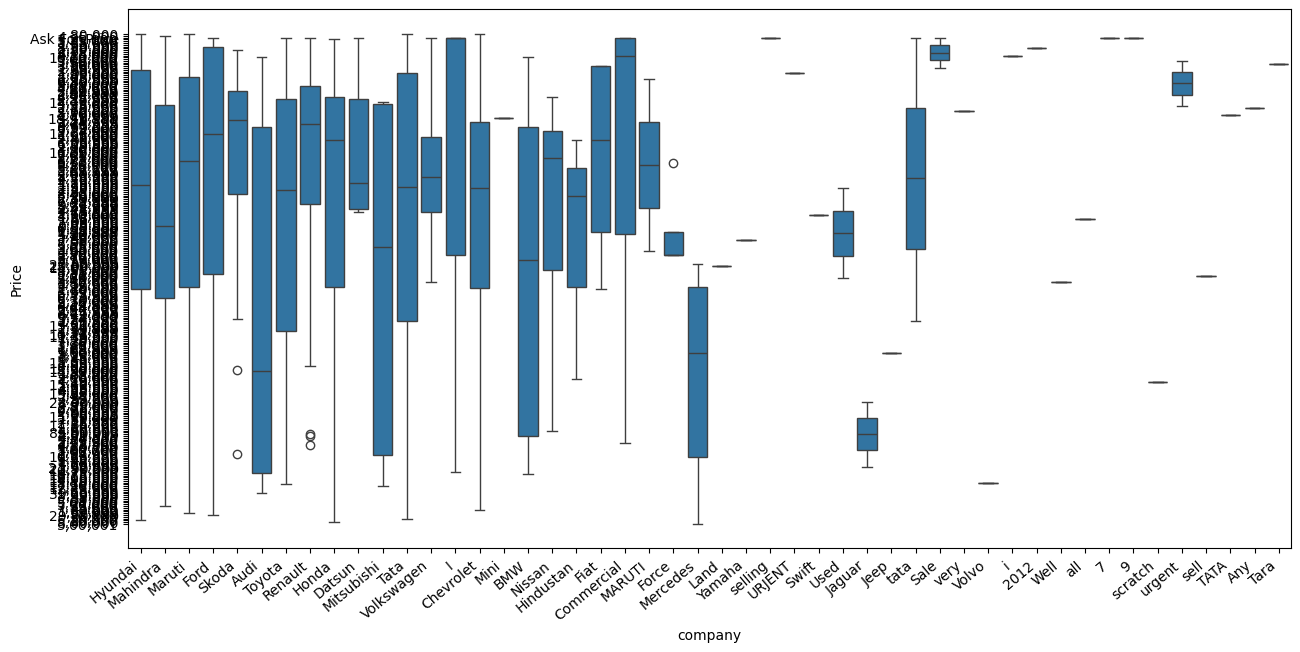

In [128]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

Checking relationship of Year with Price


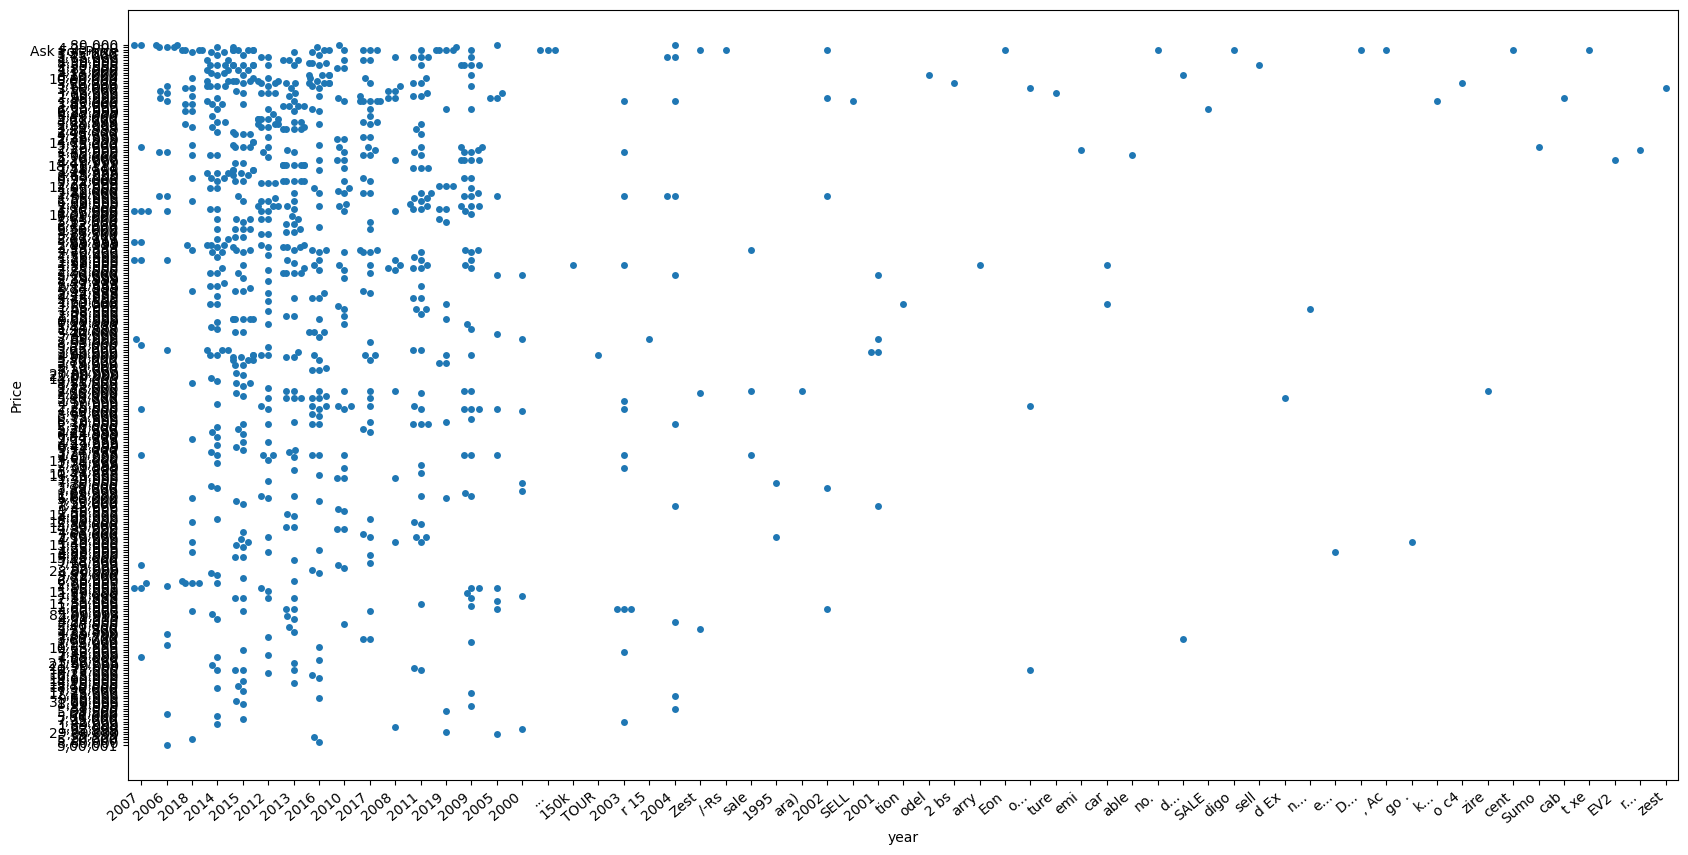

In [127]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

Checking relationship of kms_driven with Price


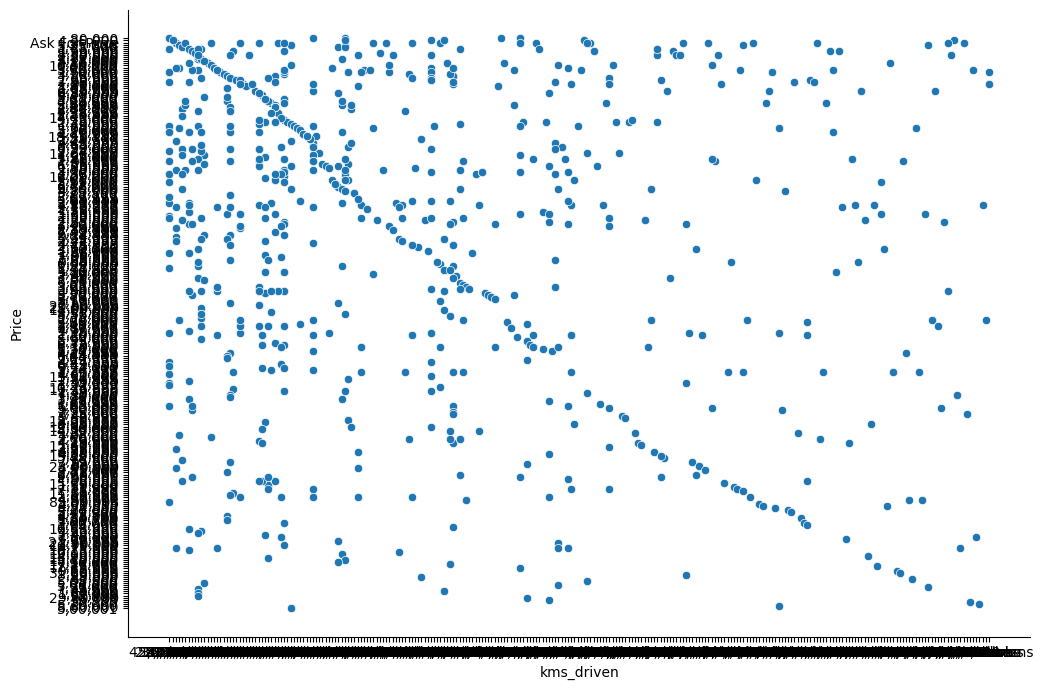

In [131]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)


Checking relationship of Fuel Type with Price


<Axes: xlabel='fuel_type', ylabel='Price'>

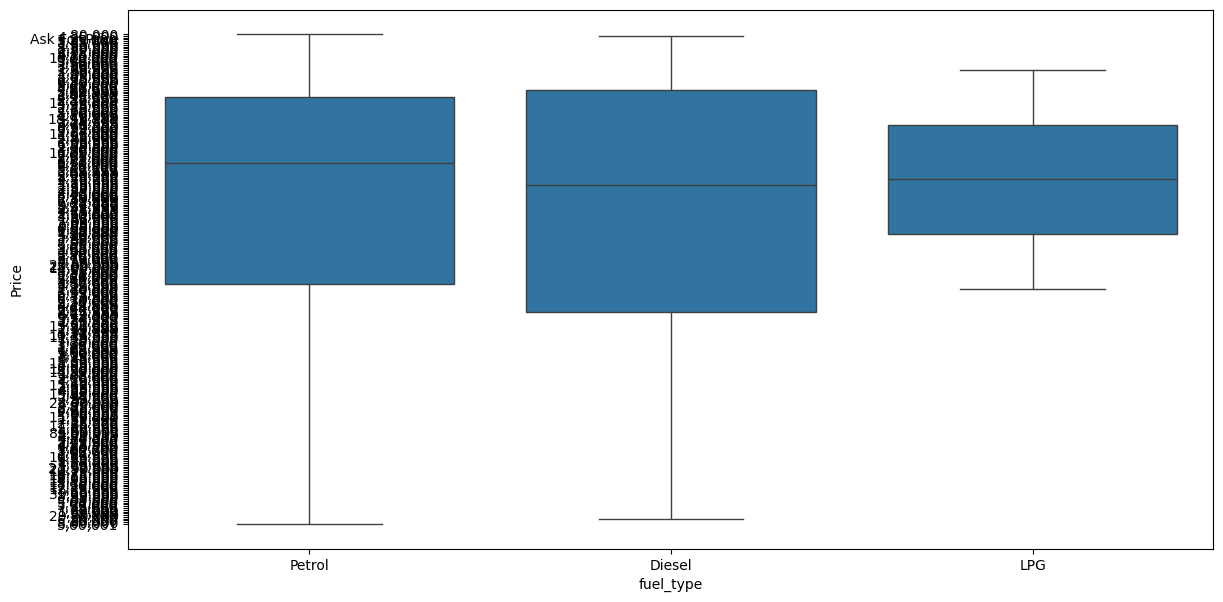

In [133]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

Relationship of Price with FuelType, Year and Company mixed


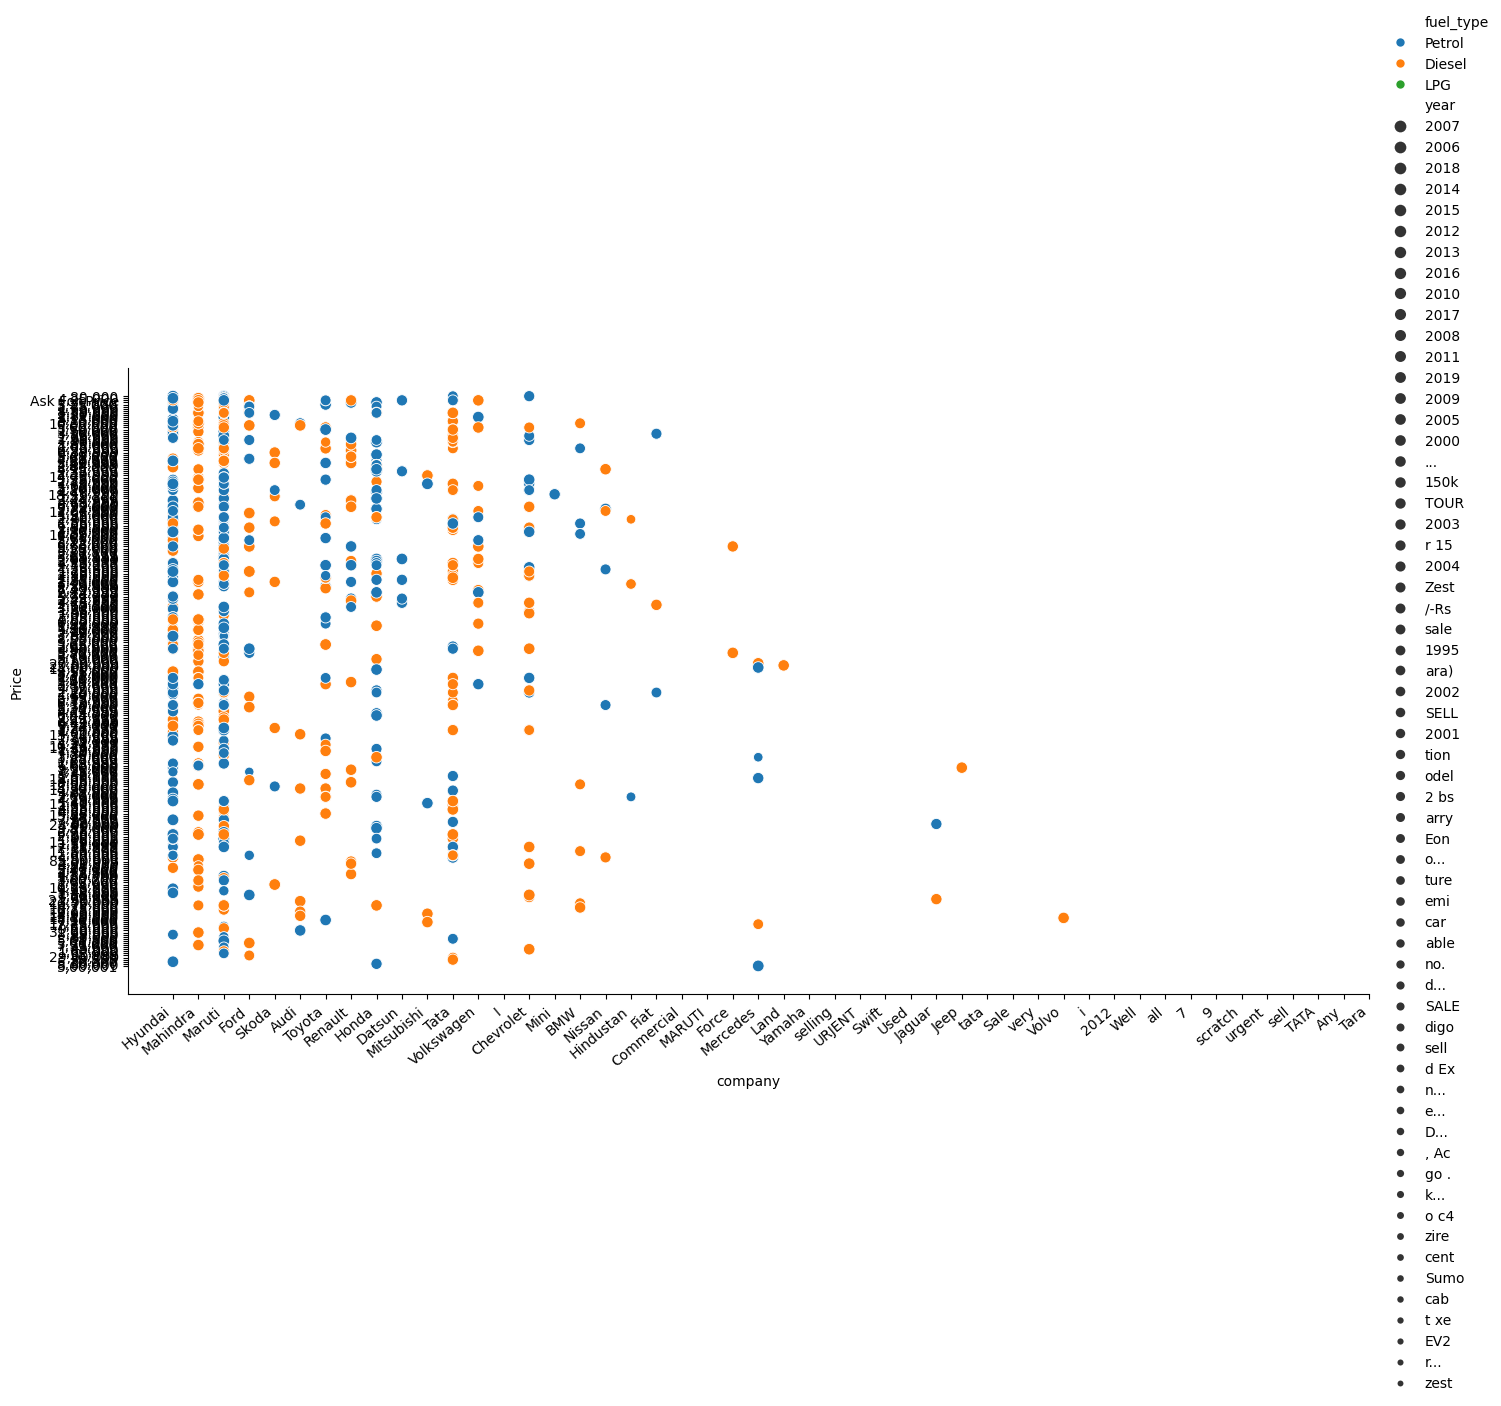

In [134]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

Extracting Training Data



In [135]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [136]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,"22,000 kms",Petrol
3,Hyundai Grand i10,Hyundai,2014,"28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"36,000 kms",Diesel
...,...,...,...,...,...
887,Ta,Tara,zest,NaN,NaN
888,Tata Zest XM,Tata,2018,"27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"40,000 kms",Diesel
890,Honda Amaze 1.2,Honda,2014,Petrol,NaN


In [137]:
y.shape


(892,)

Applying Train Test Split


In [138]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

Creating an OneHotEncoder object to contain all the possible categories


In [184]:
# Assuming 'categorical_features' is a list of names of your categorical columns
categorical_features = ['name','company','fuel_type']
numerical_features = ['year','kms_driven']


Creating a column transformer to transform categorical columns


In [185]:
# Create a ColumnTransformer to handle categorical and numerical features
column_trans = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(), categorical_features),
        # Add other transformers for numerical features if needed
        ('numerical', StandardScaler(), numerical_features)
        # Add other transformers for numerical features if needed
    ],
    remainder='passthrough'  # Pass through any remaining columns
)

Linear Regression Model


In [186]:
lr=LinearRegression()


Making a pipeline


In [187]:
pipe=make_pipeline(column_trans,lr)


Fitting the model


In [197]:
X_train_no_nan = X_train.dropna()
y_train_no_nan = y_train[X_train_no_nan.index]


In [ ]:
pipe.fit(X_train_no_nan,y_train_no_nan)


In [ ]:
y_pred=pipe.predict(X_test)


In [ ]:
r2_score(y_test,y_pred)
